# Project 4: Machine Learning
Topic : breast cancer risk

Everett's Python Notebook

In [2]:
#importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
#loading dataset
from sklearn.datasets import load_breast_cancer
data_bunch = load_breast_cancer()

#looking at keys
data_bunch.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
#load_breast_cancer returns a "bunch" object
#this returns an array of pointers
#there is a method to return a dataframe but it requires sci-kit learn version .23

#data_bunch.data

In [5]:
#checking version of sci-kit learn
#some methods in the dataset are only compatible with sci-kit learn version .23
import nltk
import sklearn
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The nltk version is 3.4.5.
The scikit-learn version is 0.22.1.


# Converting Dataset to Pandas Dataframe
    adding target column to dataframe
    converting cleaned dataframe to csv 
    csv will be used for importing data to SQL

In [6]:
df = pd.DataFrame(data_bunch.data, columns=data_bunch.feature_names)
df["target"] = data_bunch.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
#df.columns = df.columns.str.replace(' ', '_')
#df.head()

In [8]:
#df.to_csv("breast_cancer.csv")

# Verifying meaning of target set

data_bunch.target returns an array of 1s and 0s representing malignant and benign tumors,
in this section I determine which is which
    

In [9]:
print(sum(df["target"]))
print(df['target'].count())

357
569


In [10]:
data_bunch.target_names
#this seems to verify that 0 represents a malignant tumor and 1 represents a benign tumor
#we can now understand that there are 357 benign tumors and 212 malignant tumors in the dataset

array(['malignant', 'benign'], dtype='<U9')

In [11]:
perimeter = 0
counter = 0
for i in range(0,569):
    if df["target"][i]==1:
        counter += 1
        perimeter += float(df["mean perimeter"][i])
average_p = perimeter/counter 
print('The average perimeter for benign tumors is: ' + str(average_p))



The average perimeter for benign tumors is: 78.07540616246497


In [12]:
perimeter = 0
counter = 0
for i in range(0,569):
    if df["target"][i]==0:
        counter += 1
        perimeter += float(df["mean perimeter"][i])
average_p = perimeter/counter 
print('The average perimeter for malignant tumors is: ' + str(average_p))


The average perimeter for malignant tumors is: 115.36537735849062


In [13]:
#these findings verify my conjecture that 0 means malignant and 1 means benign
#as we know that a higher perimeter is correlated with higher risk of malignancy

In [14]:
#df['target']

In [15]:
#df["mean perimeter"]

In [16]:
#target_bunch = data_bunch.target
#df_2 = pd.DataFrame(target_bunch.data, columns=target_bunch.feature_names)
#df_2.head()

#this call exists in the documentation but only for sci-kit learn version .23
#meaning i would need to update 

# Using RandomForestClassifier

to analyze feature importances

In [79]:
df = pd.DataFrame(data_bunch.data, columns=data_bunch.feature_names)
target = data_bunch.target

In [80]:
df['target'] = data_bunch.target
X = df.drop('target', axis=1)
y = df['target'] != 1
#True means malignant

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
clf = RandomForestClassifier(random_state=23, n_estimators=90).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.972027972027972


In [83]:
feature_importances = clf.feature_importances_

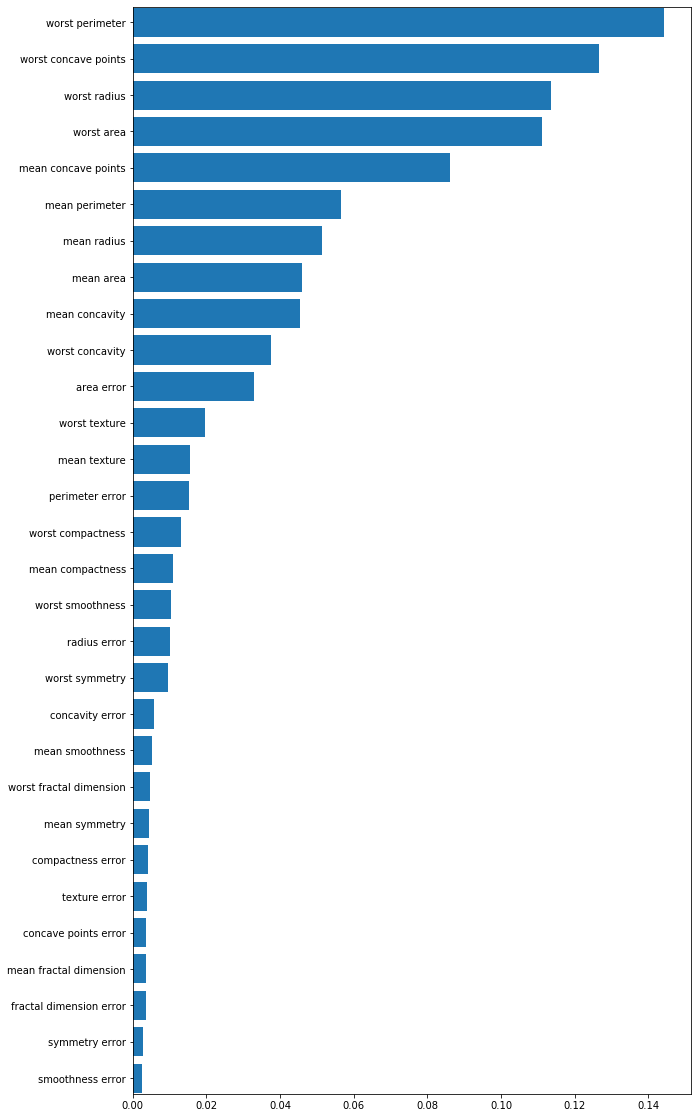

In [35]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [74]:
#print(target)
#print(df)
#df['target']

In [65]:
feature_means = df.iloc[:,20:30]
feature_means

,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...
564,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [66]:
X = feature_means

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9440559440559441


In [69]:
feature_importances = clf.feature_importances_
feature_importances

array([0.18360095, 0.04211291, 0.25050846, 0.1549044 , 0.01913974,
       0.03794944, 0.0890518 , 0.19692679, 0.01522557, 0.01057993])

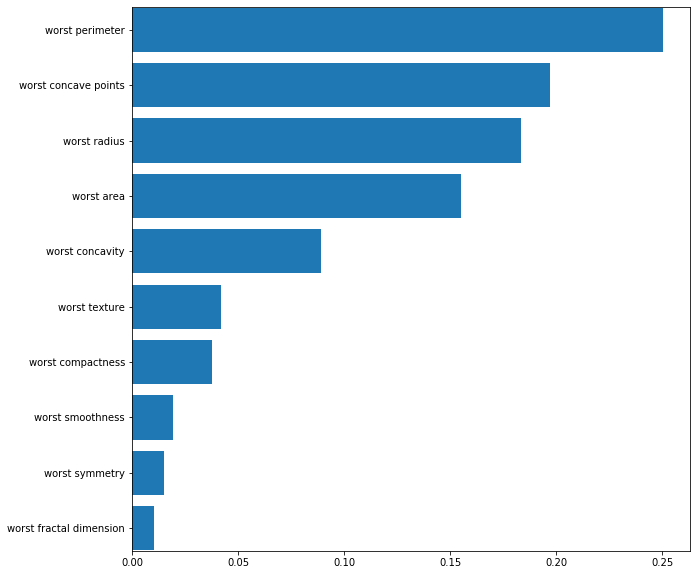

In [70]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

# Unsuccessful Attempt

In [42]:
traindf, testdf = train_test_split(df, test_size = 0.3)

In [45]:
#Generic function for making a classification model and accessing the performance. 
# From AnalyticsVidhya tutorial
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [48]:
features_mean=list(df.columns[1:11])
outcome_var=df['target']
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf, predictor_var, outcome_var)

KeyError: "None of [Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n            ...\n            1, 1, 1, 0, 0, 0, 0, 0, 0, 1],\n           dtype='int64', length=569)] are in the [columns]"

In [50]:
list(df.columns)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']